#ESTIM



---





This Python Notebook will walk you through applying different machine learning models to your own dataset


##Inputting Your Data

---



Put all of your data in the data folder

In [ ]:
data_dir = "/content/drive/My Drive/estim/data"

##Importing Packages

---





> General Imports:







In [ ]:
import math, csv, random, time
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
import glob
from collections import defaultdict
import matplotlib.pyplot as plt



> Model Imports:



In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import chi2

> Evaluation Imports:

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

>Mounting Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


>Load Data Helper:

In [ ]:
### Load data from csv file
def loadCsv(filename):
    lines = csv.reader(open(filename, newline= '', encoding='utf-8-sig'), delimiter=',', quotechar='|')
    dataset = []
    for row in lines:
        if row[12] != "": # checking if the last cell in each row (column 12) is not empty
            dataset.append([float(x) for x in row])
    return dataset

In [ ]:
### Construct data frame
def data(filename, scale):
    
    #Load data from file
    dataset = np.array(loadCsv(filename))
    indices_control_or_other = []

    # find rows that are Control (0) or Other (9)
    for i in range(len(dataset)):
        if dataset[i][1] == 0 or dataset[i][1] == 9:
            indices_control_or_other.append(i)
    
    dataset = np.delete(dataset, indices_control_or_other, 0) # delete rows that are Control/Other
    dataset = np.delete(dataset,[0, 11], 1) # deleting columns 0 and 11

    row_len = len(dataset[0])
    X = np.array(dataset[:, :row_len-1])
    y = np.array(dataset[:, row_len-1])
    # Cap ground truth within [0, 1]
    for i, truth in enumerate(y):
      if truth > 1:
        y[i] = 1
      if truth < 0:
        y[i] = 0

    #Standardize and scale data
    if (scale):
        X = preprocessing.scale(X)
    return X, y

##Intra-subject

This will test and train models for each individual subject

>Multi-Layer Perceptron (MLP):

In [ ]:

### Evaluate model
def evaluate(model_id, X, y, scale, seed=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    index_cap = len(y_train)

    
    all_index = []
    index_10 = random.sample(range(index_cap),10)
    all_index.append(index_10)
    index_20 = random.sample(range(index_cap),20)
    all_index.append(index_20)
    index_50 = random.sample(range(index_cap),50)
    all_index.append(index_50)
    index_100 = random.sample(range(index_cap),100)
    all_index.append(index_100)
    index_200 = random.sample(range(index_cap),200)
    all_index.append(index_200)

    for i in range(1):
        if (index_cap) > 500:
            index_500 = random.sample(range(index_cap),500)
            all_index.append(index_500)
        else:
            index_500 = random.sample(range(index_cap),index_cap)
            all_index.append(index_500)
            break
        if (index_cap) > 1000:
            index_1000 = random.sample(range(index_cap),1000)
            all_index.append(index_1000)
        else:
            index_1000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_1000)
            break
        if (index_cap) > 2000:
            index_2000 = random.sample(range(index_cap),2000)
            all_index.append(index_2000)
        else:
            index_2000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_2000)
            break

    for i, indices in enumerate(all_index):
      length = len(indices)
      print("Fitting model parameters on training set")
      t0 = time.time()
      grid = {'activation': ['identity','logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
      'hidden_layer_sizes': [(10, ), (20, ), (30, ), (40, ), (50, ), (10, 10, ), (20, 10, )], }
      clf = GridSearchCV(MLPRegressor(max_iter = 1000, solver = 'adam' , random_state=seed), param_grid=grid, cv=5, scoring='neg_mean_squared_error')
      clf.fit(X_train[indices], y_train[indices])
      print("done in %0.3fs" % (time.time() - t0))
      print("\nBest estimator found by grid search:")
      print('\t'+str(clf.best_estimator_))

      print("\nEvaluating best estimator on test set")
      t0 = time.time()
      y_pred = clf.predict(X_test)
      # cap predictions within [0, 1]
      for j, pred in enumerate(y_pred):
        if pred > 1:
          y_pred[j] = 1
        if pred < 0:
          y_pred[j] = 0
      print("done in %0.3fs" % (time.time() - t0))

      score = round(mean_absolute_error(y_test, y_pred), 4)
      print('\n\t\tMAE (test):', score)
      scores_MLP_intra[i].append(score)



scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_2000 = []

scores_MLP_intra = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_2000]
experiment_strings = ["10", "20", "50", "100", "200", "500", "1000", "2000"]

test_files = []


#### Methods to run:
start = time.time()
for filepath in glob.iglob(data_dir + '/*.csv'):
    X, y = data(filepath, True)
    print("Evaluating:" + filepath)
    evaluate(id, X, y, True, 42)
end = time.time()
print("Total run time:")
print(end - start)

Evaluating:/content/drive/My Drive/estim/data/JFTO126_final.csv
Fitting model parameters on training set
done in 22.805s

Best estimator found by grid search:
	MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Evaluating best estimator on test set
done in 0.001s

		MAE (test): 0.2269
Fitting model parameters on training set
done in 25.394s

Best estimator found by grid search:
	MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,


ValueError: ignored

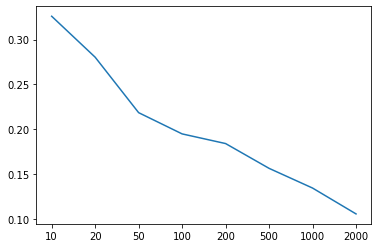

In [ ]:
### Plotting code for MLP intrasubject incremental
# mean across test files
mean_scores_MLP_intra = [np.mean(experiment_scores) for experiment_scores in scores_MLP_intra]

plt.plot(experiment_strings, mean_scores_MLP_intra)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Multi-Layer Perceptron Intra-Subject')


> Random Forest:

In [ ]:

### Evaluate model
def evaluate(model_id, X, y, scale, seed=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    index_cap = len(y_train)

    all_index = []
    index_10 = random.sample(range(index_cap),10)
    all_index.append(index_10)
    index_20 = random.sample(range(index_cap),20)
    all_index.append(index_20)
    index_50 = random.sample(range(index_cap),50)
    all_index.append(index_50)
    index_100 = random.sample(range(index_cap),100)
    all_index.append(index_100)
    index_200 = random.sample(range(index_cap),200)
    all_index.append(index_200)

    for i in range(1):
        if (index_cap) > 500:
            index_500 = random.sample(range(index_cap),500)
            all_index.append(index_500)
        else:
            index_500 = random.sample(range(index_cap),index_cap)
            all_index.append(index_500)
            break
        if (index_cap) > 1000:
            index_1000 = random.sample(range(index_cap),1000)
            all_index.append(index_1000)
        else:
            index_1000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_1000)
            break
        if (index_cap) > 2000:
            index_2000 = random.sample(range(index_cap),2000)
            all_index.append(index_2000)
        else:
            index_2000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_2000)
            break

    for i, indices in enumerate(all_index):
      length = len(indices)
      print("Fitting model parameters on training set")
      t0 = time.time()
      grid = {'n_estimators': (10, 50, 100, 1000),'min_samples_split': [2,5,10]}
      clf = GridSearchCV(estimator = RandomForestRegressor(max_features = "auto",
                                                           criterion = "mse", random_state = 42),
                          param_grid=grid, cv=5, iid=False, scoring='neg_mean_squared_error')
      clf.fit(X_train[indices], y_train[indices])
      print("done in %0.3fs" % (time.time() - t0))
      print("\nBest estimator found by grid search:")
      print('\t'+str(clf.best_estimator_))

      print("\nEvaluating best estimator on test set")
      t0 = time.time()
      y_pred = clf.predict(X_test)
      # cap predictions within [0, 1]
      for j, pred in enumerate(y_pred):
        if pred > 1:
          y_pred[j] = 1
        if pred < 0:
          y_pred[j] = 0
      print("done in %0.3fs" % (time.time() - t0))

      score = round(mean_absolute_error(y_test, y_pred), 4)
      print('\n\t\tMAE (test):', score)
      scores_RF_intra[i].append(score)



scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_2000 = []

scores_RF_intra = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_2000]
experiment_strings = ["10", "20", "50", "100", "200", "500", "1000", "2000"]

test_files = []


#### Methods to run:
start = time.time()
for filepath in glob.iglob(data_dir + '/*.csv'):
    X, y = data(filepath, True)
    print("Evaluating:" + filepath)
    evaluate(id, X, y, True, 42)
end = time.time()
print("Total run time:")
print(end - start)

Evaluating:/content/drive/My Drive/estim/data/JFTO126_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.127s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.002s

		MAE (test): 0.166
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.494s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.1219
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.237s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.012s

		MAE (test): 0.1377
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.101s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.064s

		MAE (test): 0.0925
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.484s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.002s

		MAE (test): 0.0642
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 28.316s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.072s

		MAE (test): 0.0375
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 29.700s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.074s

		MAE (test): 0.0323
Evaluating:/content/drive/My Drive/estim/data/JFTO127_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.189s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.005s

		MAE (test): 0.4745
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.373s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.062s

		MAE (test): 0.2022
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.046s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.058s

		MAE (test): 0.1773
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.175s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.1573
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.779s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.0858
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 25.732s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.064s

		MAE (test): 0.0806
Evaluating:/content/drive/My Drive/estim/data/JFTO128_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.132s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.003s

		MAE (test): 0.4944
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.419s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.008s

		MAE (test): 0.3353
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.079s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.1857
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.123s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.085s

		MAE (test): 0.1375
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.845s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.007s

		MAE (test): 0.117
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 31.672s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.007s

		MAE (test): 0.0871
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 38.279s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.120s

		MAE (test): 0.0617
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 52.775s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.013s

		MAE (test): 0.0707
Evaluating:/content/drive/My Drive/estim/data/JFTO129_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.319s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.010s

		MAE (test): 0.3079
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.723s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.072s

		MAE (test): 0.1816
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.345s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.008s

		MAE (test): 0.129
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.287s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.010s

		MAE (test): 0.1015
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 22.123s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.010s

		MAE (test): 0.0738
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 29.298s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.099s

		MAE (test): 0.0432
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 38.811s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.127s

		MAE (test): 0.0256
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 54.253s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.126s

		MAE (test): 0.0159
Evaluating:/content/drive/My Drive/estim/data/JFTO131_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.138s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.007s

		MAE (test): 0.3511
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.473s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.063s

		MAE (test): 0.2891
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.042s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.001s

		MAE (test): 0.1893
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.912s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.069s

		MAE (test): 0.147
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 22.979s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.072s

		MAE (test): 0.0971
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 28.589s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.082s

		MAE (test): 0.0752
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 35.491s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.088s

		MAE (test): 0.0365
Evaluating:/content/drive/My Drive/estim/data/JFTO132_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.242s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.007s

		MAE (test): 0.326
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.403s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.008s

		MAE (test): 0.3545
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.837s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.1437
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.049s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.081s

		MAE (test): 0.1274
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 22.902s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.140s

		MAE (test): 0.0882
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 28.555s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.153s

		MAE (test): 0.0537
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 38.302s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.114s

		MAE (test): 0.0359
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 49.890s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.015s

		MAE (test): 0.0245
Evaluating:/content/drive/My Drive/estim/data/JFTO175_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.152s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.002s

		MAE (test): 0.3277
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 19.473s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.071s

		MAE (test): 0.2808
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.286s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.079s

		MAE (test): 0.2018
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.094s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.003s

		MAE (test): 0.1047
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 23.641s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.093s

		MAE (test): 0.0998
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 30.184s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.106s

		MAE (test): 0.0577
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 38.359s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.008s

		MAE (test): 0.0434
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 61.552s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.146s

		MAE (test): 0.0367
Evaluating:/content/drive/My Drive/estim/data/JFTO176_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.175s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.005s

		MAE (test): 0.2569
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.422s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.003s

		MAE (test): 0.243
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.199s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.078s

		MAE (test): 0.1555
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.129s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.098
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 23.612s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.091s

		MAE (test): 0.0818
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 30.126s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.108s

		MAE (test): 0.0507
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 40.241s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.118s

		MAE (test): 0.0366
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 59.904s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.140s

		MAE (test): 0.0261
Evaluating:/content/drive/My Drive/estim/data/JFTO204_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.187s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.006s

		MAE (test): 0.3645
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.548s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.005s

		MAE (test): 0.237
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.199s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.079s

		MAE (test): 0.1582
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.247s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.003s

		MAE (test): 0.1414
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 23.807s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.093s

		MAE (test): 0.1045
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 30.348s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.109s

		MAE (test): 0.0697
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 40.723s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.121s

		MAE (test): 0.048
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 57.127s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.009s

		MAE (test): 0.0361
Evaluating:/content/drive/My Drive/estim/data/JFTO205_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.214s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.007s

		MAE (test): 0.2218
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.468s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.012s

		MAE (test): 0.2262
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 20.145s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.079s

		MAE (test): 0.16
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.292s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.144s

		MAE (test): 0.1303
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 22.417s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.011s

		MAE (test): 0.0626
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 30.315s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.108s

		MAE (test): 0.0477
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 40.431s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.117s

		MAE (test): 0.0311
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 56.516s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.016s

		MAE (test): 0.0253
Evaluating:/content/drive/My Drive/estim/data/JFTO144_final.csv
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.378s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.009s

		MAE (test): 0.2916
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.487s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.005s

		MAE (test): 0.3076
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 18.996s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.003s

		MAE (test): 0.2316
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.334s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.086s

		MAE (test): 0.203
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 21.933s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.008s

		MAE (test): 0.132
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 27.556s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.013s

		MAE (test): 0.1101
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 38.575s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.116s

		MAE (test): 0.0746
Fitting model parameters on training set


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


done in 56.852s

Best estimator found by grid search:
	RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Evaluating best estimator on test set
done in 0.120s

		MAE (test): 0.0725


ValueError: ignored

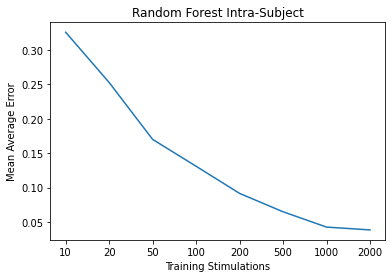

In [ ]:
### Plotting code for MLP intrasubject incremental
# mean across test files
mean_scores_RF_intra = [np.mean(experiment_scores) for experiment_scores in scores_RF_intra]
#np.save('scores_RF_intra',scores_RF_intra)
plt.plot(experiment_strings, mean_scores_RF_intra)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Intra-Subject')


##Cross-Subject

>MLP:

In [ ]:
def evaluate(model_id, X_train, y_train, X_test, y_test, seed=42):
    index_cap = len(y_train)

    all_index = []
    index_10 = random.sample(range(index_cap),10)
    all_index.append(index_10)
    index_20 = random.sample(range(index_cap),20)
    all_index.append(index_20)
    index_50 = random.sample(range(index_cap),50)
    all_index.append(index_50)
    index_100 = random.sample(range(index_cap),100)
    all_index.append(index_100)
    index_200 = random.sample(range(index_cap),200)
    all_index.append(index_200)

    for i in range(1):
        if (index_cap) > 500:
            index_500 = random.sample(range(index_cap),500)
            all_index.append(index_500)
        else:
            index_500 = random.sample(range(index_cap),index_cap)
            all_index.append(index_500)
            break
        if (index_cap) > 1000:
            index_1000 = random.sample(range(index_cap),1000)
            all_index.append(index_1000)
        else:
            index_1000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_1000)
            break
        if (index_cap) > 2000:
            index_2000 = random.sample(range(index_cap),2000)
            all_index.append(index_2000)
        else:
            index_2000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_2000)
            break
    for i, indices in enumerate(all_index):
        length = len(indices)
        print("Fitting model parameters on training set")
        t0 = time.time()
        grid = {'activation': ['identity','logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
        'hidden_layer_sizes': [(10, ), (20, ), (30, ), (40, ), (50, ), (10, 10, ), (20, 10, )], }
        clf = GridSearchCV(MLPRegressor(max_iter = 1000, solver = 'adam' , random_state=seed), param_grid=grid, cv=5, iid=False, scoring='neg_mean_squared_error')
        clf.fit(X_train[indices], y_train[indices])
        print("done in %0.3fs" % (time.time() - t0))
        print("\nBest estimator found by grid search:")
        print('\t'+str(clf.best_estimator_))

        print("\nEvaluating best estimator on test set")
        t0 = time.time()
        y_pred = clf.predict(X_test)

        # cap predictions within [0, 1]
        for j, pred in enumerate(y_pred):
          if pred > 1:
            y_pred[j] = 1
          if pred < 0:
            y_pred[j] = 0

        print("done in %0.3fs" % (time.time() - t0))

        score = round(mean_absolute_error(y_test, y_pred), 4)
        print('\n\t\tMAE (test):', score)

        scores_MLP_cross[i].append(score)


# ### Methods to run:


scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_2000 = []

scores_MLP_cross = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_2000]
experiment_strings = ["10", "20", "50", "100", "200", "500", "1000", "2000"]

scores = []
test_files = [] #corresponding order with scores

start = time.time()

for test_file in glob.iglob(data_dir + '/*.csv'):
    test_files.append(test_file)
    print(f"Starting training with held-out test file: {test_file}")
    train_X = None
    train_y = None
    test_X, test_y = data(test_file, True)
    for filepath in glob.iglob(data_dir + '/*.csv'):
        if filepath != test_file:
            file_X, file_y = data(filepath, True)
            if train_X is not None:
                train_X = np.concatenate((train_X, file_X))
                train_y = np.concatenate((train_y, file_y))
            else:
                train_X = file_X
                train_y = file_y
            print(f"Added {filepath} to training set")
    evaluate(id, train_X, train_y, test_X, test_y, 42)

for test_file, score in zip(test_files, scores):
    print(f"MAE {score} for held-out test subject {test_file}")

end = time.time()
print("Total run time:")
print(end - start)

In [ ]:
### Plotting code for MLP intrasubject incremental
# mean across test files
mean_scores_MLP_cross = [np.mean(experiment_scores) for experiment_scores in scores_MLP_cross]

plt.plot(experiment_strings, mean_scores_MLP_cross)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Multi-Layer Perceptron Cross-Subject')


> Random Forest:

In [ ]:
### Evaluate model
def evaluate(model_id, X_train, y_train, X_test, y_test, seed=42):
    index_cap = len(y_train)

    all_index = []
    index_10 = random.sample(range(index_cap),10)
    all_index.append(index_10)
    index_20 = random.sample(range(index_cap),20)
    all_index.append(index_20)
    index_50 = random.sample(range(index_cap),50)
    all_index.append(index_50)
    index_100 = random.sample(range(index_cap),100)
    all_index.append(index_100)
    index_200 = random.sample(range(index_cap),200)
    all_index.append(index_200)

    for i in range(1):
        if (index_cap) > 500:
            index_500 = random.sample(range(index_cap),500)
            all_index.append(index_500)
        else:
            index_500 = random.sample(range(index_cap),index_cap)
            all_index.append(index_500)
            break
        if (index_cap) > 1000:
            index_1000 = random.sample(range(index_cap),1000)
            all_index.append(index_1000)
        else:
            index_1000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_1000)
            break
        if (index_cap) > 2000:
            index_2000 = random.sample(range(index_cap),2000)
            all_index.append(index_2000)
        else:
            index_2000 = random.sample(range(index_cap),index_cap)
            all_index.append(index_2000)
            break

    for i, indices in enumerate(all_index):
        length = len(indices)
        print("Fitting model parameters on training set")
        t0 = time.time()
        grid = {'n_estimators': (10, 50, 100, 1000),'min_samples_split': [2,5,10]}
        clf = GridSearchCV(estimator = RandomForestRegressor(max_features = "auto", criterion = "mse", random_state = 42), param_grid=grid, cv=5, iid=False, scoring='neg_mean_squared_error')
        clf.fit(X_train[indices], y_train[indices])
        print("done in %0.3fs" % (time.time() - t0))
        print("\nBest estimator found by grid search:")
        print('\t'+str(clf.best_estimator_))

        print("\nEvaluating best estimator on test set")
        t0 = time.time()
        y_pred = clf.predict(X_test)
        for j, pred in enumerate(y_pred):
            if pred > 1:
                y_pred[j] = 1
            if pred < 0:
                y_pred[j] = 0
        print("done in %0.3fs" % (time.time() - t0))

        score = round(mean_absolute_error(y_test, y_pred), 4)
        print('\n\t\tMAE (test):', score)

        scores_RF_cross[i].append(score)

# ### Methods to run:
scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_2000 = []

scores_RF_cross = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_2000]
experiment_strings = ["10", "20", "50", "100", "200", "500", "1000", "2000"]

scores = []
test_files = [] #corresponding order with scores


start = time.time()

for test_file in glob.iglob(data_dir + '/*.csv'):
    test_files.append(test_file)
    print(f"Starting training with held-out test file: {test_file}")
    train_X = None
    train_y = None
    test_X, test_y = data(test_file, True)
    for filepath in glob.iglob(data_dir + '/*.csv'):
        if filepath != test_file:
            
            file_X, file_y = data(filepath, True)
            if train_X is not None:
                train_X = np.concatenate((train_X, file_X))
                train_y = np.concatenate((train_y, file_y))
            else:
                train_X = file_X
                train_y = file_y
            print(f"Added {filepath} to training set")
    evaluate(id, train_X, train_y, test_X, test_y, 42)

for test_file, score in zip(test_files, scores):
    print(f"MAE {score} for held-out test subject {test_file}")

end = time.time()
print("Total run time:")
print(end - start)

In [ ]:
### Plotting code for RF Cross-Subject incremental
# mean across test files
mean_scores_RF_cross = [np.mean(experiment_scores) for experiment_scores in scores_RF_cross]

plt.plot(experiment_strings, mean_scores_RF_cross)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Cross-Subject')


##Incremental Pre-Trained

>MLP:

In [ ]:
### Evaluate model
def evaluate(model_id, X_train, y_train, X_test, y_test, X, y, seed=42):

  print("Fitting model parameters on training set")
  t0 = time.time()
  grid = {'activation': ['identity','logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
	'hidden_layer_sizes': [(10, ), (20, ), (30, ), (40, ), (50, ), (10, 10, ), (20, 10, )], }
  clf = GridSearchCV(MLPRegressor(max_iter = 1000, solver = 'adam' , random_state=seed), param_grid=grid, cv=5, iid=False, scoring='neg_mean_squared_error')
  clf.fit(X_train, y_train)
  print("done in %0.3fs" % (time.time() - t0))
  print("\nBest estimator found by grid search:")
  print('\t'+str(clf.best_estimator_))

  print("\nEvaluating best estimator on test set")

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

  index_cap = len(y_train)

  all_index = []
  index_10 = random.sample(range(index_cap),10)
  all_index.append(index_10)
  index_20 = random.sample(range(index_cap),20)
  all_index.append(index_20)
  index_50 = random.sample(range(index_cap),50)
  all_index.append(index_50)
  index_100 = random.sample(range(index_cap),100)
  all_index.append(index_100)
  index_200 = random.sample(range(index_cap),200)
  all_index.append(index_200)




  for i in range(1):
    if (index_cap) > 500:
      index_500 = random.sample(range(index_cap),500)
      all_index.append(index_500)
    else:
      index_500 = random.sample(range(index_cap),index_cap)
      all_index.append(index_500)
      break
    if (index_cap) > 1000:
      index_1000 = random.sample(range(index_cap),1000)
      all_index.append(index_1000)
    else:
      index_1000 = random.sample(range(index_cap),index_cap)
      all_index.append(index_1000)
      break
    if (index_cap) > 2000:
      index_2000 = random.sample(range(index_cap),2000)
      all_index.append(index_2000)
    else:
      index_2000 = random.sample(range(index_cap),index_cap)
      all_index.append(index_2000)
      break

  for i, indices in enumerate(all_index):
    length = len(indices)
    print("Fitting model parameters on training set using", length, "rows of training set")
    t0 = time.time()
    grid = {'activation': ['identity','logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
		'hidden_layer_sizes': [(10, ), (20, ), (30, ), (40, ), (50, ), (10, 10, ), (20, 10, )], }
    new_clf = clf.best_estimator_
		#clf = GridSearchCV(MLPRegressor(max_iter = 1000, solver = 'lbfgs' , random_state=seed), param_grid=grid, cv=5, iid=False, scoring='neg_mean_squared_error')
    for j in range(1000):
     new_clf.partial_fit(X_train[indices], y_train[indices])
    print("done in %0.3fs" % (time.time() - t0))

    print("\nEvaluating best estimator on test set")
    t0 = time.time() 
    y_pred = new_clf.predict(X_test)
  
    print("done in %0.3fs" % (time.time() - t0))
    score = round(mean_absolute_error(y_test, y_pred), 4)
    print('\n\t\tMAE (test):', score)
    #cap predictions within [0, 1]
    for j, pred in enumerate(y_pred):
      if pred > 1:
        y_pred[j] = 1
      if pred < 0:
        y_pred[j] = 0
    
    scores_MLP_pre[i].append(score)
    
scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_2000 = []

scores_MLP_pre = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_2000]
experiment_strings = ["10", "20", "50", "100", "200", "500", "1000", "2000"]

scores = []
test_files = [] #corresponding order with scores

start = time.time()

for test_file in glob.iglob(data_dir + '/*.csv'):
  test_files.append(test_file)
  print(f"Starting training with held-out test file: {test_file}")
  train_X = None
  train_y = None
  test_X, test_y = data(test_file, True)
  for filepath in glob.iglob(data_dir + '/*.csv'):
	  if filepath != test_file:

		  file_X, file_y = data(filepath, True)
		  if train_X is not None:
			  train_X = np.concatenate((train_X, file_X))
			  train_y = np.concatenate((train_y, file_y))
		  else:
			  train_X = file_X
			  train_y = file_y
		  print(f"Added {filepath} to training set")
  X, y = data(test_file, True)
  evaluate(id, train_X, train_y, test_X, test_y, 42)

for test_file, score in zip(test_files, scores):
  print(f"MAE {score} for held-out test subject {test_file}")

end = time.time()
print("Total run time:")
print(end - start)

In [ ]:
### Plotting code for MLP pretrained
# mean across test files
mean_scores_MLP_pre = [np.mean(experiment_scores) for experiment_scores in scores_MLP_pre]

plt.plot(experiment_strings, mean_scores_MLP_pre)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Multi-Layer Perceptron Pre-Trained')


> Random Forest:

In [ ]:
pip install incremental_trees
from incremental_trees.trees import StreamingRFR

In [ ]:
### Evaluate model
def evaluate(model_id, X_non_subject, y_non_subject, X_subject, y_subject, seed=42):

    print("Fitting model parameters on non-subject data")
    t0 = time.time()
    #grid = {'n_estimators': (10, 50, 100, 1000),'min_samples_split': [2,5,10]}
    #grid_search = GridSearchCV(estimator = StreamingRFR(n_estimators=10, max_features = "auto", criterion = "mse", random_state = 42, warm_start=True), param_grid=grid, cv=5, iid=False, scoring='neg_mean_squared_error')
    pre_model = StreamingRFR(n_estimators = 1000, max_features = 'auto', criterion = 'mse', random_state= 42,min_samples_split = 10)
    pre_model.fit(X_non_subject,y_non_subject)
    #grid_search.fit(X_non_subject, y_non_subject)

    #pretrained_model = model.best_estimator_
    pretrained_model = pre_model

    print("done in %0.3fs" % (time.time() - t0))
    print("\nBest estimator found by grid search:")
    print('\t'+str(pretrained_model))


    X_subject_train, X_subject_test, y_subject_train, y_subject_test = train_test_split(X_subject, y_subject, test_size=0.2, random_state=42)

    
    print("\nEvaluating model trained only on other subjects on our current subject's test data.")
    t0 = time.time()
    y_pred = pretrained_model.predict(X_subject_test)
    print("done in %0.3fs" % (time.time() - t0))

    score = round(mean_absolute_error(y_pred, y_subject_test), 4)
    print('\n\t\tMAE (test):', score)
    index_cap = len(y_subject_train)

    all_index = []
    index_10 = random.sample(range(index_cap),10)
    all_index.append(index_10)
    index_20 = random.sample(range(index_cap),20)
    all_index.append(index_20)
    index_50 = random.sample(range(index_cap),50)
    all_index.append(index_50)
    index_100 = random.sample(range(index_cap),100)
    all_index.append(index_100)
    index_200 = random.sample(range(index_cap),200)
    all_index.append(index_200)




    for i in range(1):
        if (index_cap) > 500:
          index_500 = random.sample(range(index_cap),500)
          all_index.append(index_500)
        else:
          index_500 = random.sample(range(index_cap),index_cap)
          all_index.append(index_500)
          break
        if (index_cap) > 1000:
          index_1000 = random.sample(range(index_cap),1000)
          all_index.append(index_1000)
        else:
          index_1000 = random.sample(range(index_cap),index_cap)
          all_index.append(index_1000)
          break
        if (index_cap) > 2000:
          index_2000 = random.sample(range(index_cap),2000)
          all_index.append(index_2000)
        else:
          index_2000 = random.sample(range(index_cap),index_cap)
          all_index.append(index_2000)
          break

    for i, indices in enumerate(all_index):
        model = pretrained_model
        #model.warm_start = True
        model.n_estimators_per_chunk = 1000
        model.max_n_estimators = np.inf 
        length = len(indices)
        print("Fitting model parameters on subject data using", length, "rows")
        t0 = time.time()
        for j in range(1):
          model.partial_fit(X_subject_train[indices], y_subject_train[indices])
        print("done in %0.3fs" % (time.time() - t0))

        print("\nEvaluating best estimator on test set")
        t0 = time.time()
        y_pred = model.predict(X_subject_test)
        print("done in %0.3fs" % (time.time() - t0))
        #cap predictions within [0, 1]
        for j, pred in enumerate(y_pred):
          if pred > 1:
            y_pred[j] = 1
          if pred < 0:
            y_pred[j] = 0   
        score = round(mean_absolute_error(y_pred, y_subject_test), 4)

        print('\n\t\tMAE (test):', score)
        

        scores_RF_pre[i].append(score)
        
    return y_pred



scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_2000 = []

scores_RF_pre = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_2000]
experiment_strings = ["10", "20", "50", "100", "200", "500", "1000", "2000"]

scores = []
test_files = [] #corresponding order with scores

start = time.time()

for test_file in glob.iglob(data_dir + '/*.csv'):
  test_files.append(test_file)
  print(f"Starting training with held-out test file: {test_file}")
  train_X = None
  train_y = None
  test_X, test_y = data(test_file, True)
  for filepath in glob.iglob(data_dir + '/*.csv'):
	  if filepath != test_file:

		  file_X, file_y = data(filepath, True)
		  if train_X is not None:
			  train_X = np.concatenate((train_X, file_X))
			  train_y = np.concatenate((train_y, file_y))
		  else:
			  train_X = file_X
			  train_y = file_y
		  print(f"Added {filepath} to training set")
  X, y = data(test_file, True)
  evaluate(id, train_X, train_y, test_X, test_y, 42)

for test_file, score in zip(test_files, scores):
  print(f"MAE {score} for held-out test subject {test_file}")

end = time.time()
print("Total run time:")
print(end - start)

In [ ]:
### Plotting code for RF pretrained
# mean across test files
mean_scores_RF_pre = [np.mean(experiment_scores) for experiment_scores in scores_RF_pre]

plt.plot(experiment_strings, mean_scores_RF_pre)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Pre-Trained')

##Active Learning

In [ ]:
!pip install modAL

> Random Forest:

In [ ]:
# Active Learning Imports
from modAL.models import ActiveLearner

#### USER PARAMETERS: ####
# Number of trials to run
num_trials = 20

# Number of rows for inital active learner training
num_init_rows = 5

# Test ratio (for train-test split)
test_ratio = 0.2
#########################

### Load data from csv file

In [ ]:
### RF Query Strategy (max standard deviation over tree predictions)
def RF_std_query(active_learer, X):
    RF = active_learer.estimator
    per_tree_pred = np.array([tree.predict(X) for tree in RF.estimators_])
    std_arr = np.std(per_tree_pred, axis=0) # std of predictions over all trees 
    query_idx = np.argmax(std_arr)
    return query_idx, X[query_idx]

In [ ]:
scores_RF_active = []
### Evaluate model
def evaluate(model_id, X, y, scale=False, seed=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=seed)

    # choose a small amount of random rows for initial training (e.g. 5)
    init_indices = np.random.choice(index_cap, num_init_rows, replace=False)
    print(f"Indices of intial train data: {init_indices}")
    init_X = X_train[init_indices]
    init_y = y_train[init_indices]

    # remove the initial rows from our train data
    X_train = np.delete(X_train, init_indices, axis=0)
    y_train = np.delete(y_train, init_indices, axis=0)

    z = 0
    for num_train in experiments:
        num_queries = num_train - num_init_rows

        learner = ActiveLearner(estimator=RandomForestRegressor(max_features="auto", criterion="mse",
         n_estimators=100, random_state=42), query_strategy=RF_std_query, X_training=init_X, y_training=init_y)

        for _ in range(num_queries):
            query_idx, query_instance = learner.query(X_train)
            #print(query_idx)
            learner.teach(X_train[query_idx].reshape(1, -1), np.array([y_train[query_idx]]))

        y_pred = learner.predict(X_test)
        #print("done in %0.3fs" % (time.time() - t0))

        # cap predictions within [0, 1]
        for i, pred in enumerate(y_pred):
          if pred > 1:
            y_pred[i] = 1
          if pred < 0:
            y_pred[i] = 0

        score = round(mean_absolute_error(y_test, y_pred), 4)
        # add score for this trial to results dictionary in correct experiment row
        #results[num_train].append(score)
        scores_RF_active[z].append(score)
        print(f"MAE (test) with {num_train} rows: {score}")
        z = z + 1
        
## Methods to run:
scores_10 = []
scores_20 = []
scores_50 = []
scores_100 = []
scores_200 = []
scores_500 = []
scores_1000 = []
scores_max = []

scores_RF_active = [scores_10, scores_20, scores_50, scores_100, scores_200, scores_500, scores_1000, scores_max]
experiment_strings = list(map(str, experiments))
scores_RF_active = scores_RF_active[0:len(experiment_strings)]
scores = []
test_files = [] #corresponding order with scores

In [ ]:
def to_num(label):
    # remove all non-numeric characters
    label_str = ""
    for char in label:
        if char.isdigit():
            label_str += char
    return label_str

### Main Loop (Over Files)###
print(f"Active Learning with Random Forest Regressor.")
print(f"Model trained with {num_init_rows} rows before querying starts.")

t_start = time.time()
for filepath in glob.iglob(data_dir + '/*.csv'):
    X, y = data(filepath, True)
    
    index_cap = int(len(X) * (1 - test_ratio))

    # num of training rows
    experiments = [10, 20, 50, 100, 200] 
    
    # add experiments for {500, 1000} if there are enough rows 
    if index_cap > 500:
        experiments.append(500)
    if index_cap > 1000:
        experiments.append(1000)

    # always run an experiment with all data
    experiments.append(index_cap)

    # results dictionary, with each key referring to a list of scores for that experiment
    #results = defaultdict(list)

    # RUN TRIALS
    for trial in range(1, num_trials + 1):
        print(f"FILE {filepath}. TRIAL {trial}/{num_trials}.")
        evaluate(id, X, y, True, 42)

    # convert to DataFrame for csv saving
    #results_df = pd.DataFrame.from_dict(results, orient="index")

   # results_df.to_csv(f"RF_ActiveLearn_{to_num(filepath)}.csv")
#    print(results_df)

t_end = time.time()
print("Time: ", t_end - t_start)

Active Learning with Random Forest Regressor.
Model trained with 5 rows before querying starts.
FILE /content/drive/My Drive/estim/data/JFTO126_final.csv. TRIAL 1/20.
Indices of intial train data: [414 157 485 466 486]
0.1409
MAE (test) with 10 rows: 0.1409
0.1247
MAE (test) with 20 rows: 0.1247
0.1541
MAE (test) with 50 rows: 0.1541
0.0932
MAE (test) with 100 rows: 0.0932
0.0578
MAE (test) with 200 rows: 0.0578
0.0383
MAE (test) with 500 rows: 0.0383
0.0363
MAE (test) with 591 rows: 0.0363
FILE /content/drive/My Drive/estim/data/JFTO126_final.csv. TRIAL 2/20.
Indices of intial train data: [ 46 555  25  76 231]
0.1846
MAE (test) with 10 rows: 0.1846
0.18
MAE (test) with 20 rows: 0.18
0.1535
MAE (test) with 50 rows: 0.1535
0.1322
MAE (test) with 100 rows: 0.1322
0.0575
MAE (test) with 200 rows: 0.0575
0.0367
MAE (test) with 500 rows: 0.0367
0.037
MAE (test) with 591 rows: 0.037
FILE /content/drive/My Drive/estim/data/JFTO126_final.csv. TRIAL 3/20.
Indices of intial train data: [298 535 

KeyboardInterrupt: ignored

ValueError: ignored

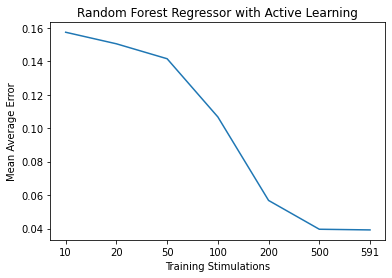

In [ ]:
### Plotting code for MLP intrasubject incremental
# mean across test files
mean_scores_RF_active = [np.mean(experiment_scores) for experiment_scores in scores_RF_active]
plt.plot(experiment_strings, mean_scores_RF_active)
plt.xlabel('Training Stimulations')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Regressor with Active Learning')
